In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [24]:
from river.drift import ADWIN

from drift_ml.drift_detection.univariate import KSWIN, KSReference, SimpleSTD
from drift_ml.drift_detection.multivariate import PCADriftDetector

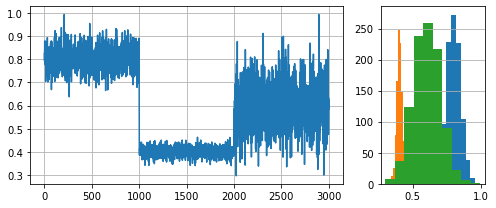

In [4]:
# Generate data for 3 distributions
random_state = np.random.RandomState(seed=42)
dist_a = random_state.normal(0.8, 0.05, 1000)
dist_b = random_state.normal(0.4, 0.02, 1000)
dist_c = random_state.normal(0.6, 0.1, 1000)

# Concatenate data to simulate a data stream with 2 drifts
stream = np.concatenate((dist_a, dist_b, dist_c))

# Auxiliary function to plot the data
def plot_data(dist_a, dist_b, dist_c, drifts=None):
    fig = plt.figure(figsize=(7,3), tight_layout=True)
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax1, ax2 = plt.subplot(gs[0]), plt.subplot(gs[1])
    ax1.grid()
    ax1.plot(stream, label='Stream')
    ax2.grid(axis='y')
    ax2.hist(dist_a, label=r'$dist_a$')
    ax2.hist(dist_b, label=r'$dist_b$')
    ax2.hist(dist_c, label=r'$dist_c$')
    if drifts is not None:
        for drift_detected in drifts:
            ax1.axvline(drift_detected, color='red')
    plt.show()

plot_data(dist_a, dist_b, dist_c)

In [47]:
drift_detector = SimpleSTD(std_thresh=3, window_size=10, shift_reference_window=True)
drift_detector.fit(dist_a)
drifts = []

Change detected at index 1003


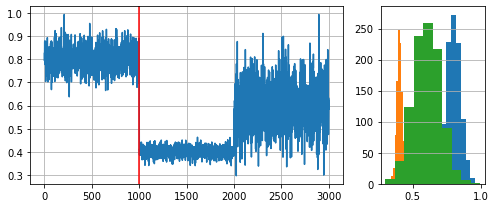

In [48]:
scores = []
for i, val in enumerate(stream):
    scores.append(drift_detector.update(val))   # Data is processed one sample at a time
    if drift_detector.drift_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Change detected at index {i}')
        drifts.append(i)

plot_data(dist_a, dist_b, dist_c, drifts)

In [98]:
import nannyml as nml

In [99]:
reference = nml.load_synthetic_binary_classification_dataset()[0]
analysis = nml.load_synthetic_binary_classification_dataset()[1]

In [117]:
reference_data = reference.iloc[:, [0, 2, 3, 6]].to_numpy()
analysis_data = analysis.iloc[:, [0, 2, 3, 6]].to_numpy()

In [167]:
drift_detector = PCADriftDetector(score_drift_detector=SimpleSTD(window_size=5000))
drift_detector.fit(reference_data)

In [168]:
scores = []
for i, val in enumerate(analysis_data):
    scores.append(drift_detector.update(val))   # Data is processed one sample at a time
    if drift_detector.drift_detected:
        # The drift detector indicates after each sample if there is a drift in the data
        print(f'Change detected at index {i}')
        drifts.append(i)

In [174]:
print(drift_detector.score_drift_detector.reference_mean)

0.6054241048172387


(array([1.6165e+04, 1.1842e+04, 8.3400e+03, 6.2250e+03, 4.5640e+03,
        2.2960e+03, 3.7800e+02, 1.4000e+02, 4.0000e+01, 1.0000e+01]),
 array([9.70052347e-07, 2.90361899e-01, 5.80722828e-01, 8.71083756e-01,
        1.16144469e+00, 1.45180561e+00, 1.74216654e+00, 2.03252747e+00,
        2.32288840e+00, 2.61324933e+00, 2.90361026e+00]),
 <BarContainer object of 10 artists>)

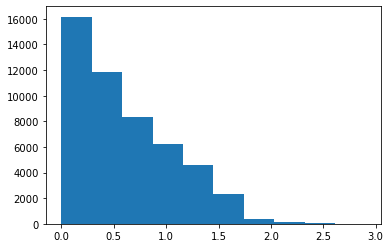

In [173]:
plt.hist(drift_detector.score_drift_detector.reference_window)

In [171]:
print(drift_detector.score_drift_detector.reference_std)

0.46307453152412625


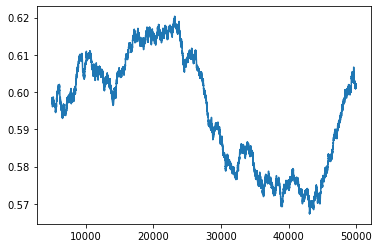

In [169]:
plt.plot(scores)

In [170]:
import nannyml as nml
from IPython.display import display

# Load synthetic data
reference = nml.load_synthetic_binary_classification_dataset()[0]
analysis = nml.load_synthetic_binary_classification_dataset()[1]
display(reference.head())

# Define feature columns
feature_column_names = [
    'distance_from_office', 'gas_price_per_litre', 'public_transportation_cost', 'tenure']
#'distance_from_office', 'gas_price_per_litre', 'public_transportation_cost', 'tenure'
print(feature_column_names)
calc = nml.DataReconstructionDriftCalculator(
    feature_column_names=feature_column_names,
    timestamp_column_name='timestamp',
    chunk_size=5000
)
calc.fit(reference)
results = calc.calculate(analysis)

figure = results.plot(plot_reference=True)
figure.show()

,distance_from_office,salary_range,gas_price_per_litre,public_transportation_cost,wfh_prev_workday,workday,tenure,identifier,work_home_actual,timestamp,y_pred_proba,period,y_pred
0,5.962247,40K - 60K €,2.119485,8.568058,False,Friday,0.212653,0,1,2014-05-09 22:27:20,0.99,reference,1
1,0.535872,40K - 60K €,2.357199,5.425382,True,Tuesday,4.927549,1,0,2014-05-09 22:59:32,0.07,reference,0
2,1.969519,40K - 60K €,2.366849,8.247158,False,Monday,0.520817,2,1,2014-05-09 23:48:25,1.00,reference,1
3,2.530410,20K - 40K €,2.318722,7.944251,False,Tuesday,0.453649,3,1,2014-05-10 01:12:09,0.98,reference,1
4,2.253635,60K+ €,2.221265,8.884478,True,Thursday,5.695263,4,1,2014-05-10 02:21:34,0.99,reference,1


['distance_from_office', 'gas_price_per_litre', 'public_transportation_cost', 'tenure']
